## Bank Customer Churn EDA

In [1]:
# Importing Dependencies
%matplotlib inline
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.preprocessing import LabelEncoder
import seaborn as sns
# Graphics in retina format are more sharp and legible
%config InlineBackend.figure_format = 'retina'

In [2]:
# Read in the data
df = pd.read_csv("..\Bank-Customer-Churn\Resources\Churn_Modelling_2.csv")
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [3]:
# Dropping the unnecessary columns
df = df.drop(["RowNumber", "CustomerId", "Surname"], axis=1)
df.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [4]:
df.shape

(10000, 11)

In [5]:
df.dtypes

CreditScore          int64
Geography           object
Gender              object
Age                  int64
Tenure               int64
Balance            float64
NumOfProducts        int64
HasCrCard            int64
IsActiveMember       int64
EstimatedSalary    float64
Exited               int64
dtype: object

In [6]:
#check null rows
df.isna().sum()

CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

In [7]:
df.duplicated().sum()

0

In [8]:
df.nunique()

CreditScore         460
Geography             3
Gender                2
Age                  70
Tenure               11
Balance            6382
NumOfProducts         4
HasCrCard             2
IsActiveMember        2
EstimatedSalary    9999
Exited                2
dtype: int64

In [9]:
df.describe()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
mean,650.528800,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700
std,96.653299,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769
min,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000
25%,584.000000,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000
50%,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000
75%,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000
max,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000


array([[<AxesSubplot:title={'center':'CreditScore'}>]], dtype=object)

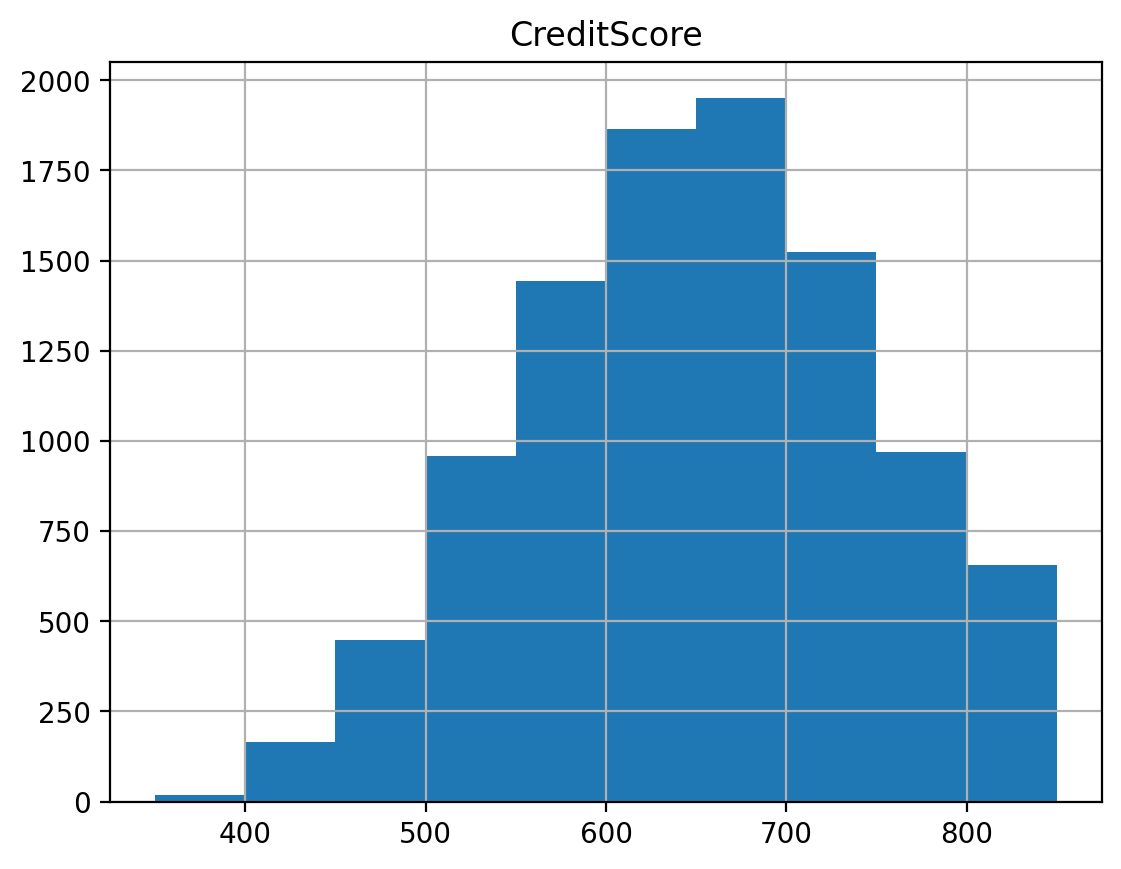

In [10]:
# Distribuion of Credit Score
df.hist(column="CreditScore")

array([[<AxesSubplot:title={'center':'Balance'}>]], dtype=object)

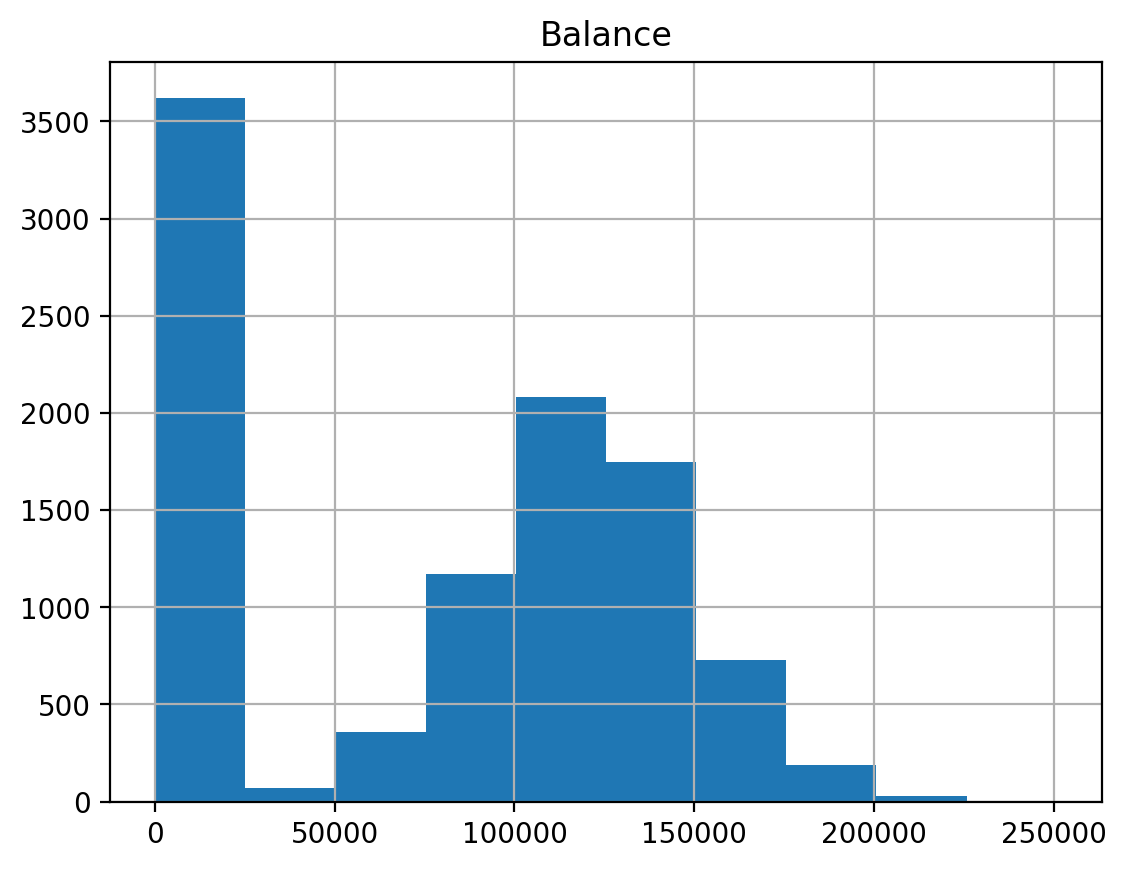

In [12]:
# Distribuion of Balance
df.hist(column="Balance")

array([[<AxesSubplot:title={'center':'Age'}>]], dtype=object)

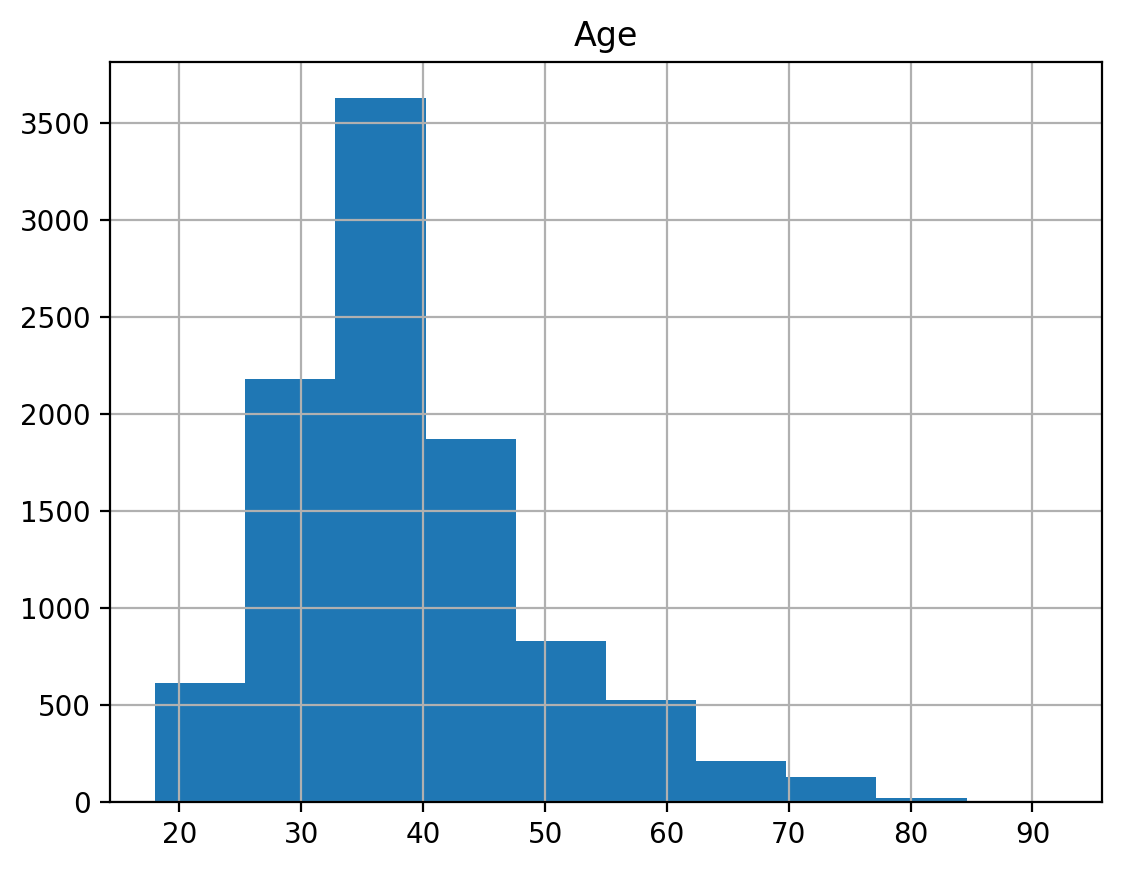

In [14]:
# Age Distribution
df.hist(column="Age")

In [15]:
columnlist= [df['CreditScore'],df['Age'],df['Tenure'],df['Balance'],df['NumOfProducts'],df['HasCrCard'],df['IsActiveMember'],df['EstimatedSalary'],df['Exited']]

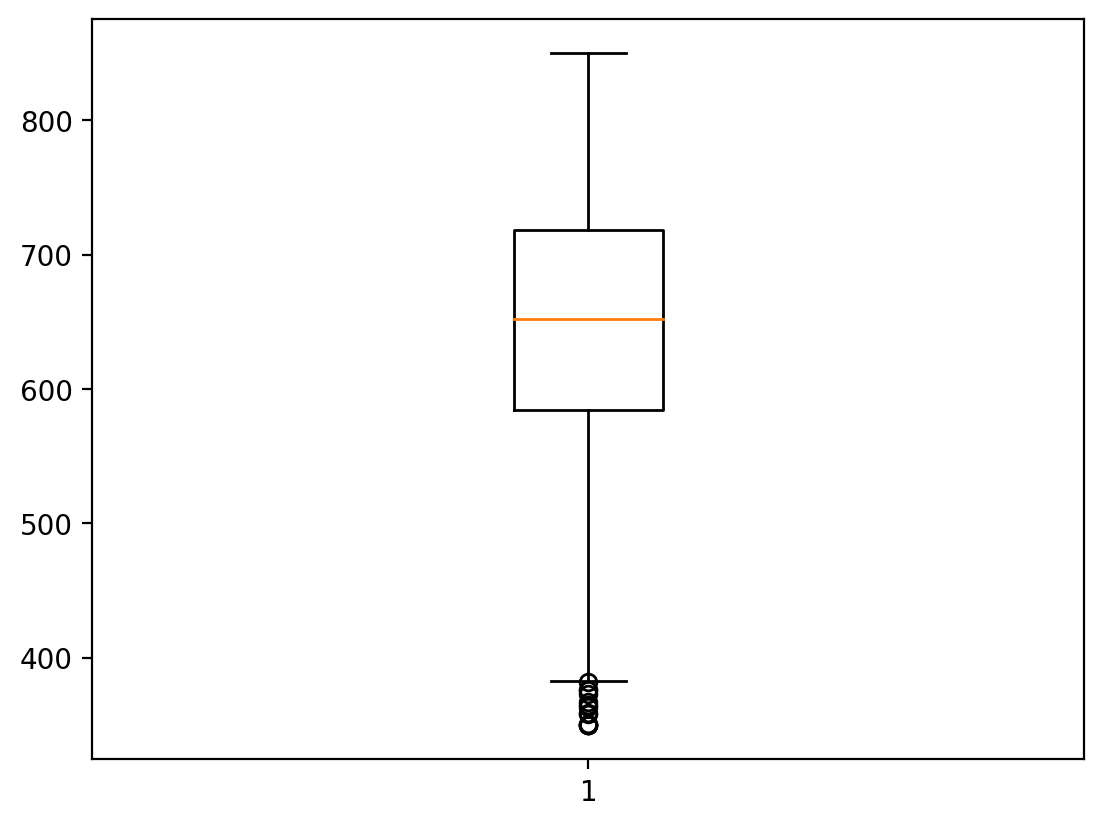

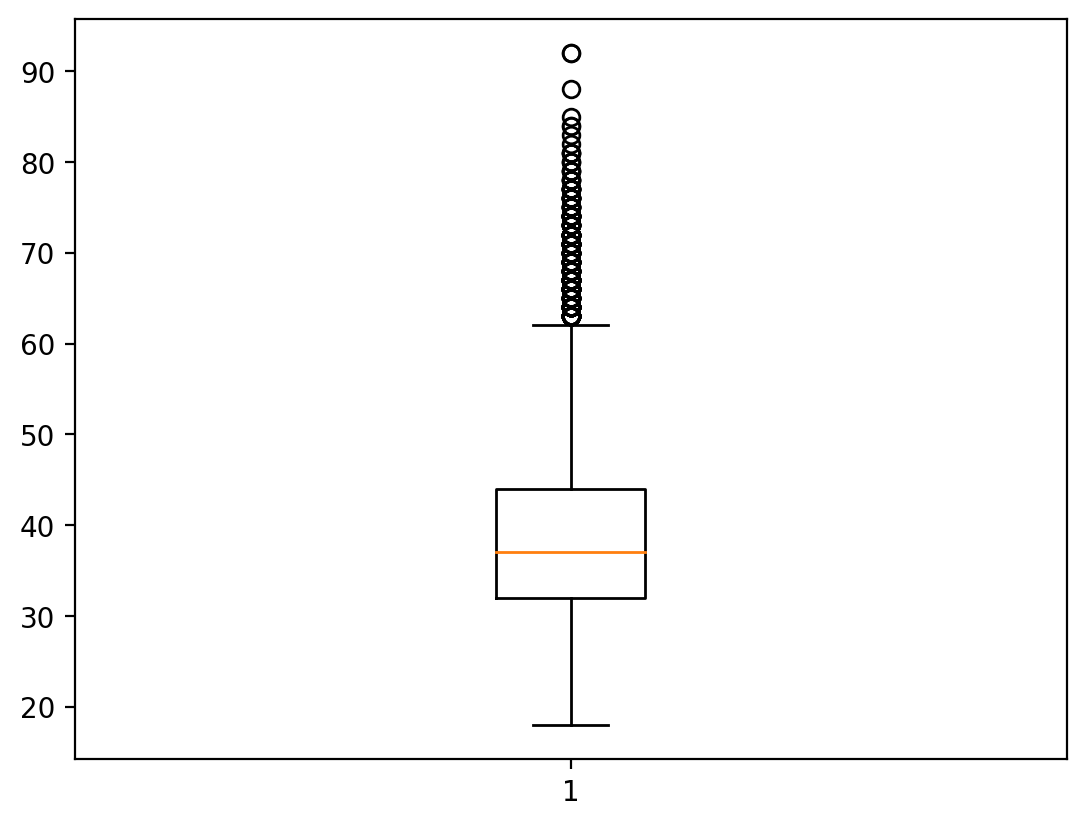

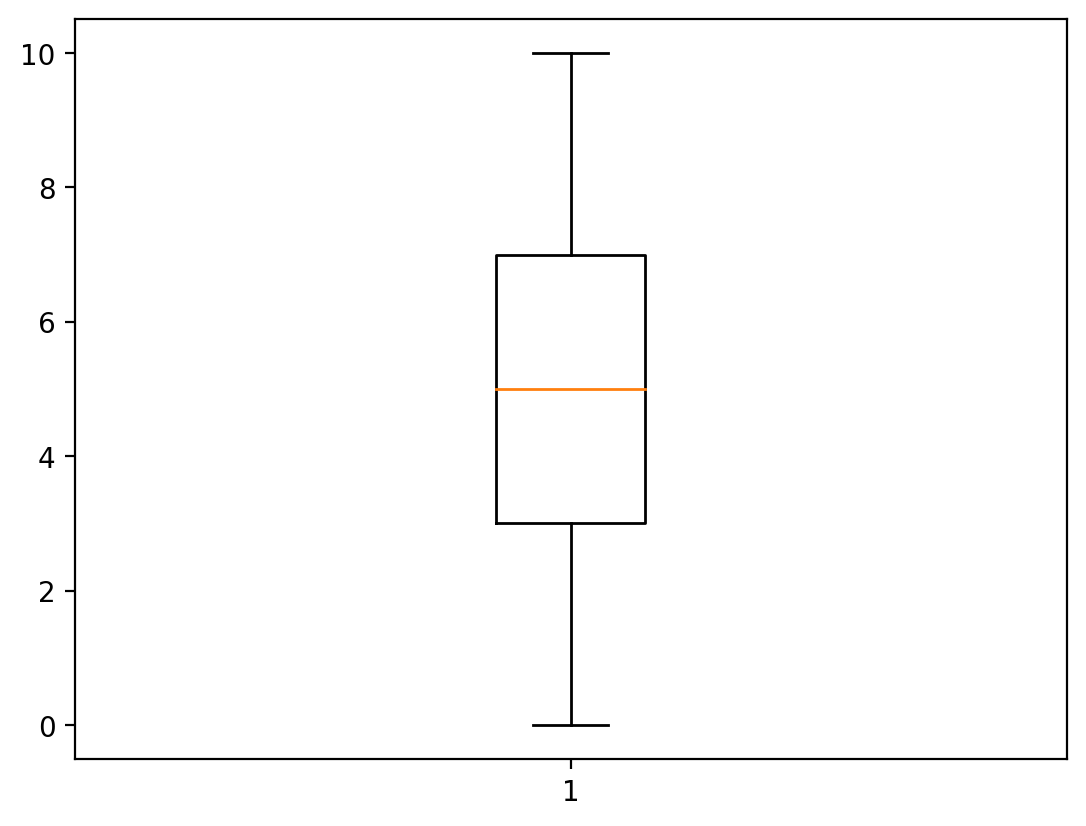

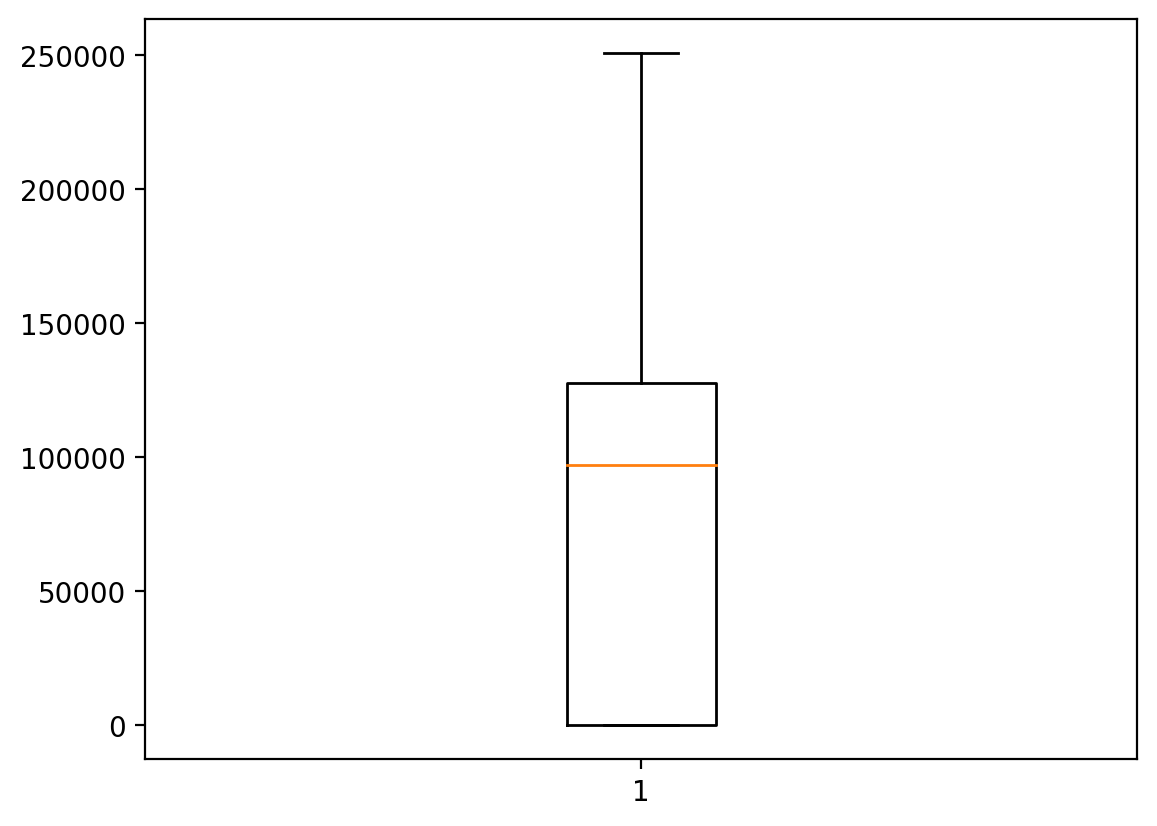

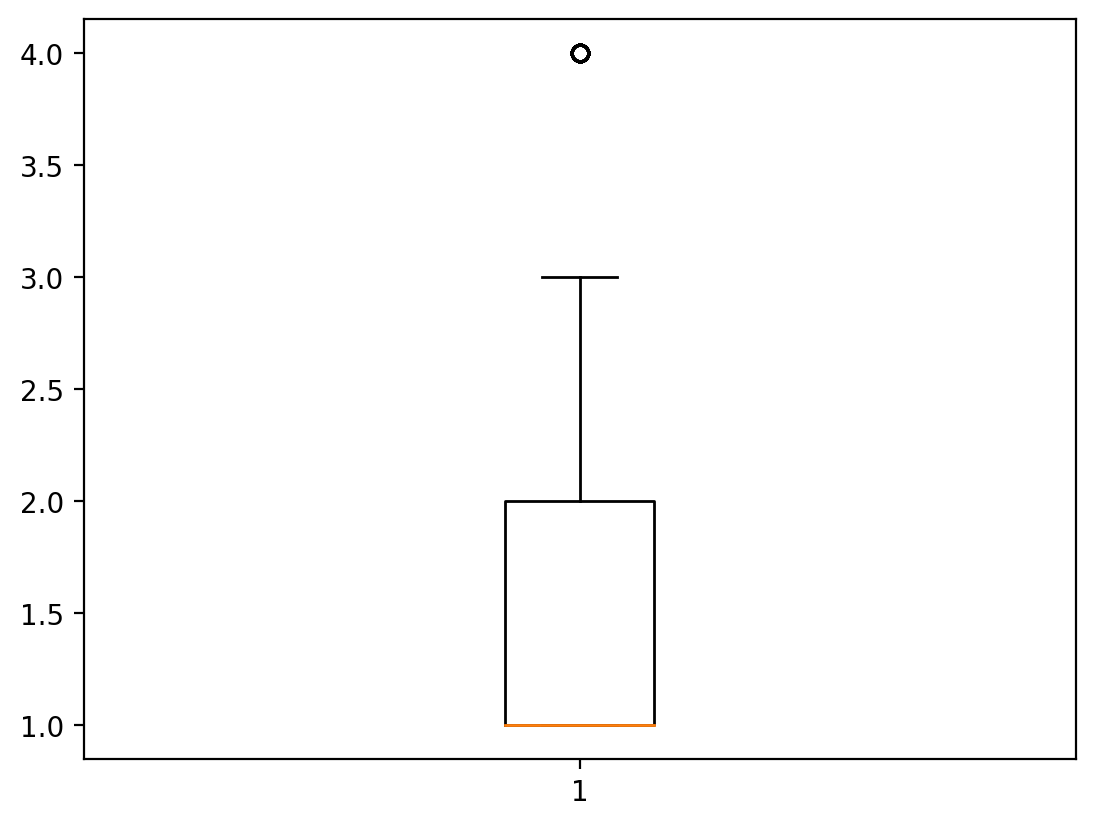

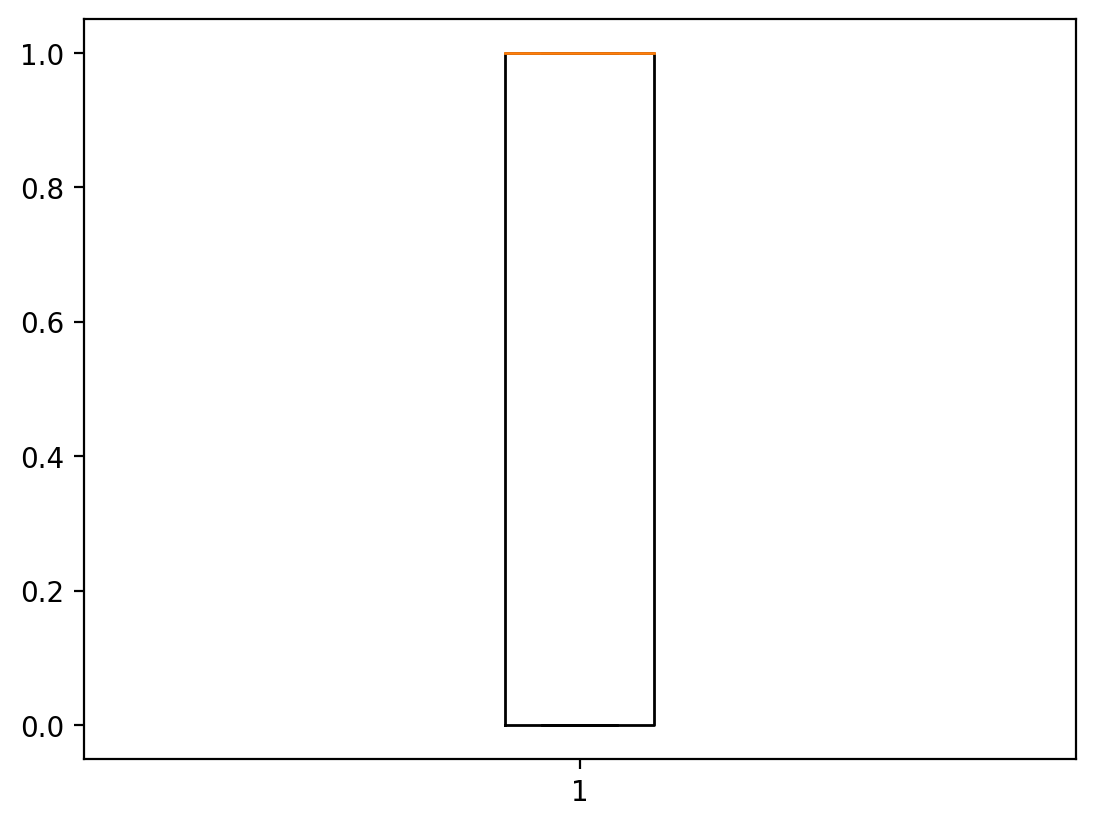

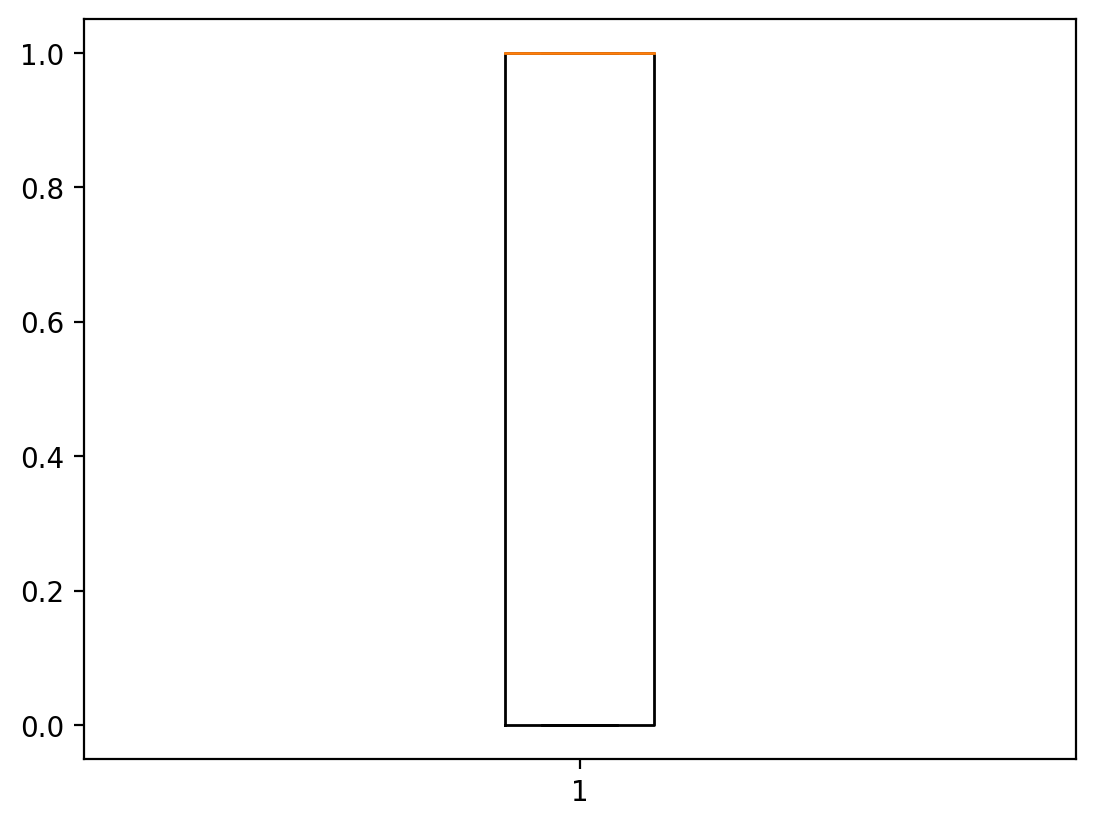

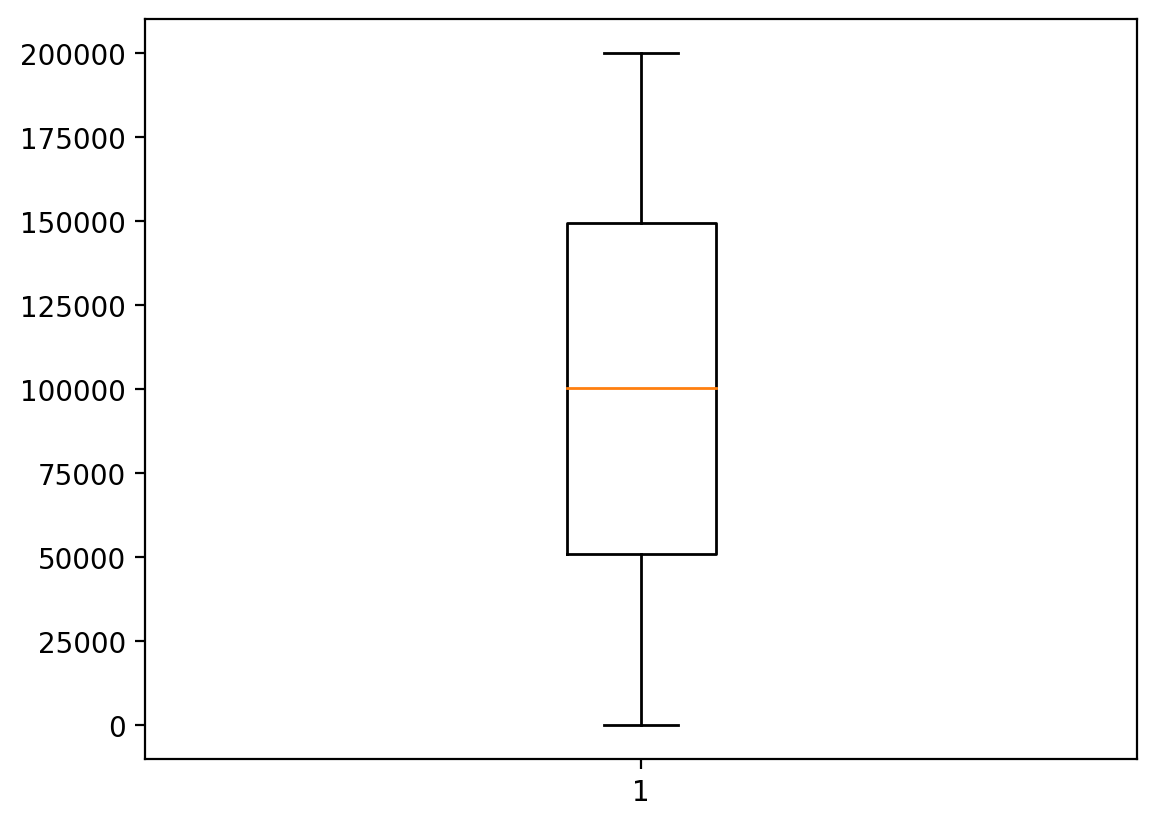

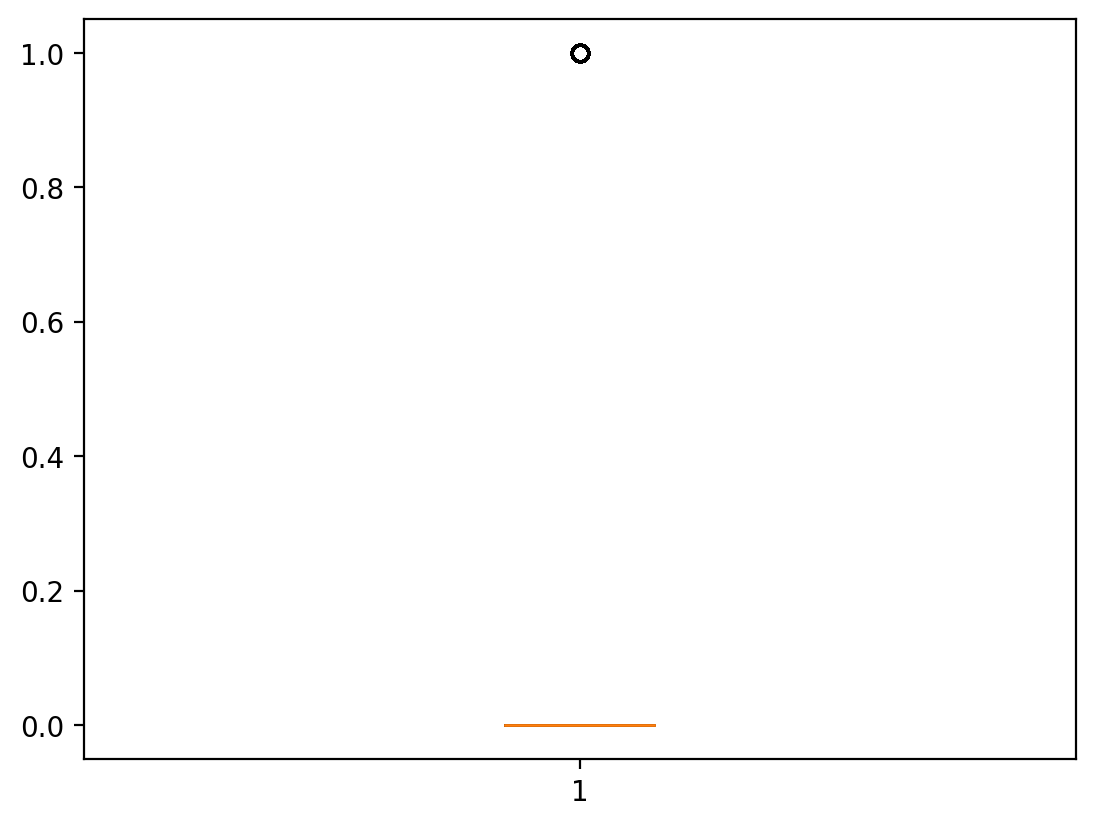

In [16]:
# Checking for outliers 
for colum in columnlist:
    plt.boxplot(colum)
    plt.show()

In [19]:
# Column list
df.columns

Index(['CreditScore', 'Geography', 'Gender', 'Age', 'Tenure', 'Balance',
       'NumOfProducts', 'HasCrCard', 'IsActiveMember', 'EstimatedSalary',
       'Exited'],
      dtype='object')

In [20]:
# Checking the 20 highest Cresit Scores
df.nlargest(20, "CreditScore")

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0
38,850,France,Male,36,7,0.00,1,1,1,40812.90,0
180,850,Spain,Female,45,2,122311.21,1,1,1,19482.50,0
200,850,Spain,Male,30,2,141040.01,1,1,1,5978.20,0
223,850,France,Male,33,10,0.00,1,1,0,4861.72,1
259,850,Germany,Male,38,3,54901.01,1,1,1,140075.55,0
356,850,Spain,Female,57,8,126776.30,2,1,1,132298.49,0
411,850,France,Male,38,1,0.00,2,1,1,80006.65,0
451,850,France,Male,40,9,0.00,2,0,1,119232.33,0
466,850,Spain,Female,32,9,0.00,2,1,1,18924.92,0


In [21]:
# Checking the1020 highest Age
df.nlargest(10, "Age")

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
6443,753,France,Male,92,3,121513.31,1,0,1,195563.99,0
6759,705,France,Male,92,1,126076.24,2,1,1,34436.83,0
2458,513,Spain,Male,88,10,0.00,2,1,1,52952.24,0
3033,787,France,Female,85,10,0.00,2,1,1,116537.96,0
3387,537,Germany,Male,84,8,92242.34,1,1,1,186235.98,0
3531,408,France,Female,84,8,87873.39,1,0,0,188484.52,1
9309,678,Germany,Male,83,6,123356.63,1,0,1,92934.41,0
766,700,France,Female,82,2,0.00,2,0,1,182055.36,0
4931,682,Germany,Male,81,6,122029.15,1,1,1,50783.88,0
7526,850,France,Female,81,1,0.00,2,1,1,59568.24,0


In [22]:
# Number of Exited and Not Exited Customers
df["Exited"].value_counts()

0    7963
1    2037
Name: Exited, dtype: int64

In [25]:
pd.crosstab(df["Exited"], df["CreditScore"], margins=True)

CreditScore,350,351,358,359,363,365,367,373,376,382,...,842,843,844,845,846,847,848,849,850,All
Exited,,,,,,,,,,,,,,,,,,,,,
0,0,0,0,0,0,0,0,0,0,0,...,4,2,4,5,3,4,5,6,190,7963
1,5,1,1,1,1,1,1,1,2,1,...,3,0,3,1,2,2,0,2,43,2037
All,5,1,1,1,1,1,1,1,2,1,...,7,2,7,6,5,6,5,8,233,10000


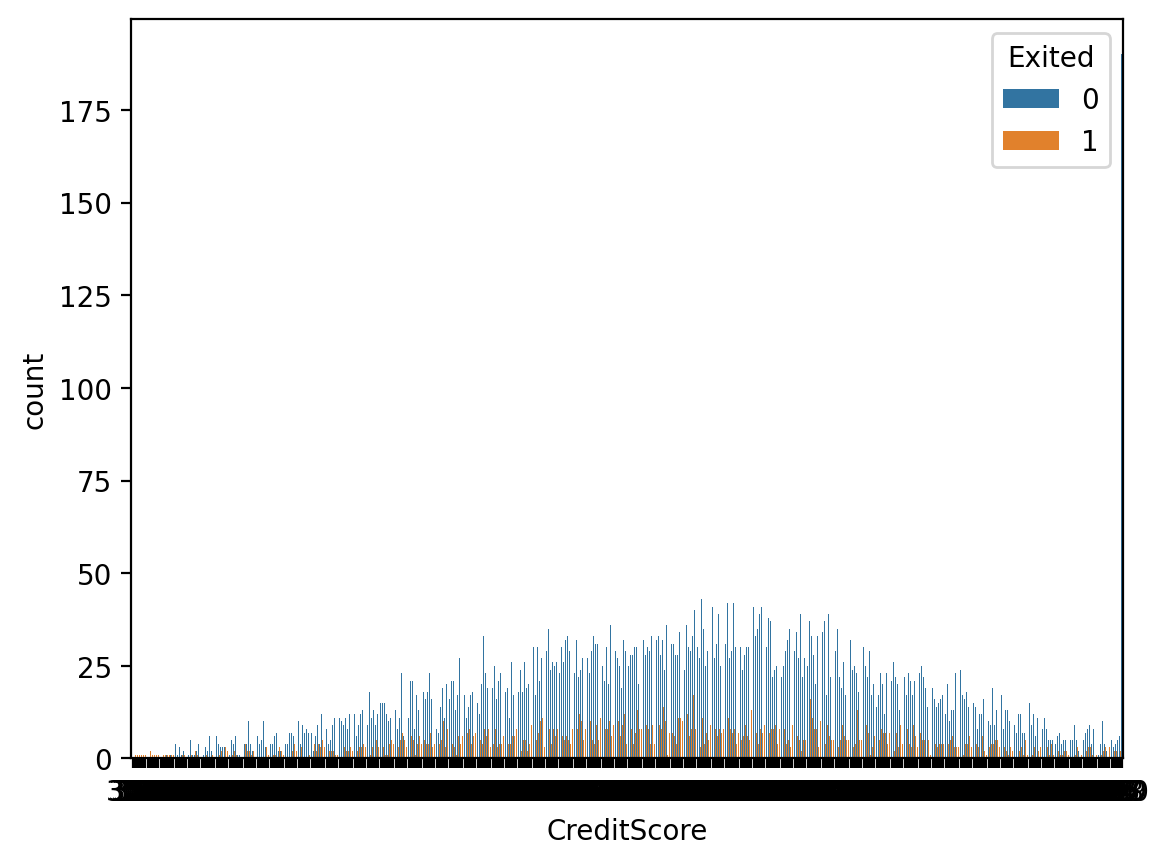

In [27]:
# Credit Score Vs Exited
sns.countplot(x="CreditScore", hue="Exited", data=df);

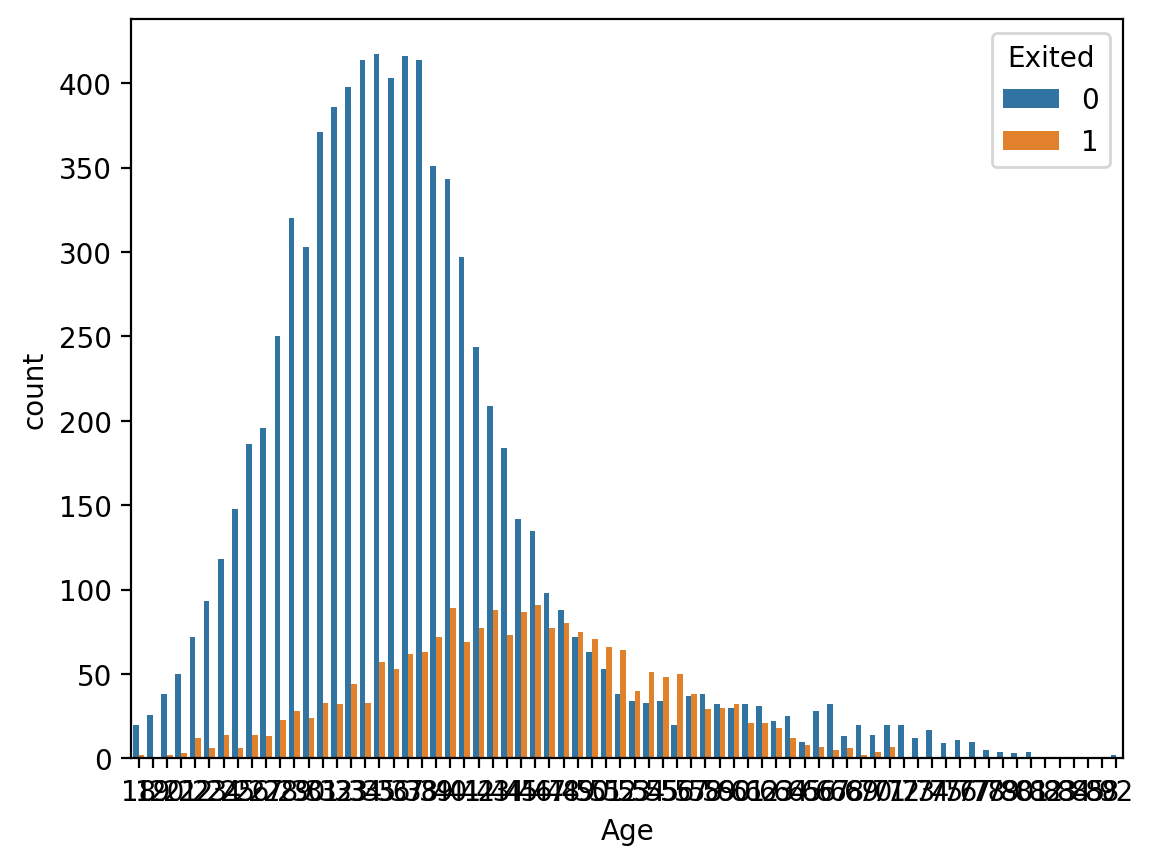

In [28]:
# Age Vs Exited
sns.countplot(x="Age", hue="Exited", data=df);

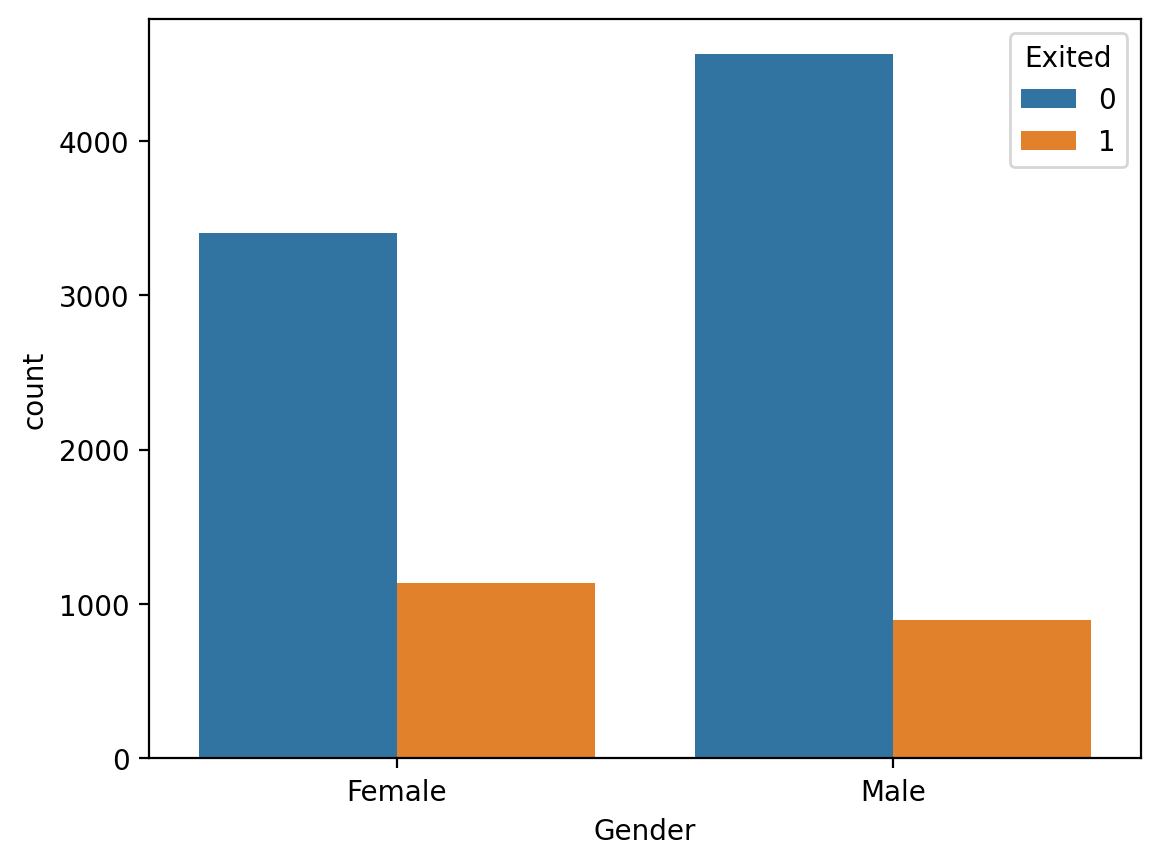

In [29]:
# Gender Vs. Exited
sns.countplot(x="Gender", hue="Exited", data=df);

### Checking outliers on numerical columns

<AxesSubplot:>

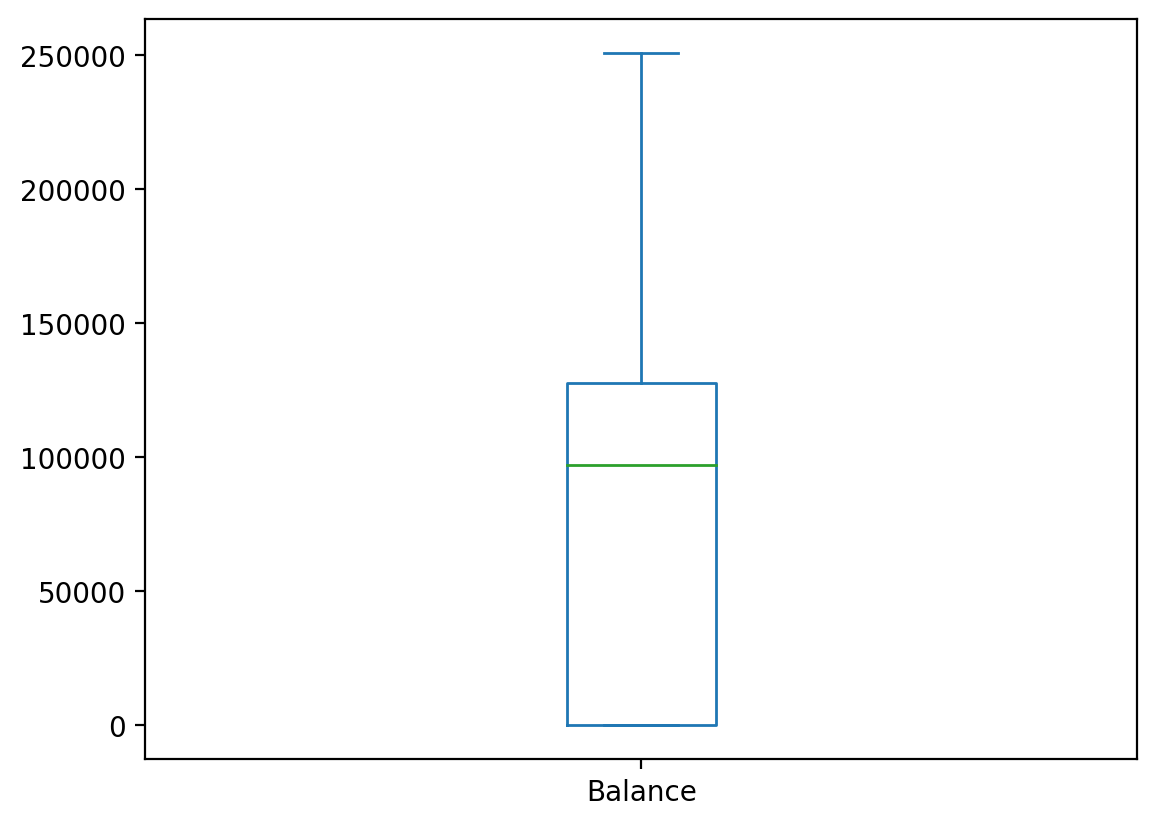

In [30]:
# Balance Outliers
df[['Balance']].plot.box()

<AxesSubplot:>

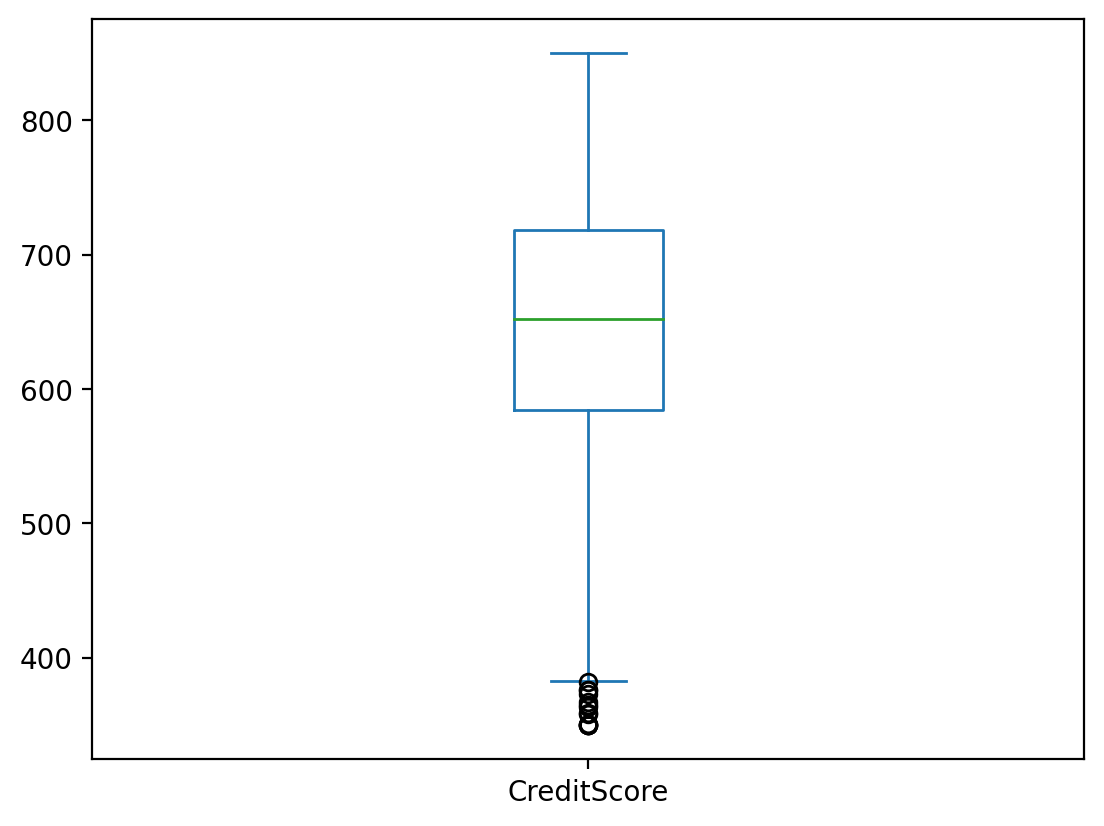

In [31]:
# Credit Score Outliers
df[['CreditScore']].plot.box()

<AxesSubplot:>

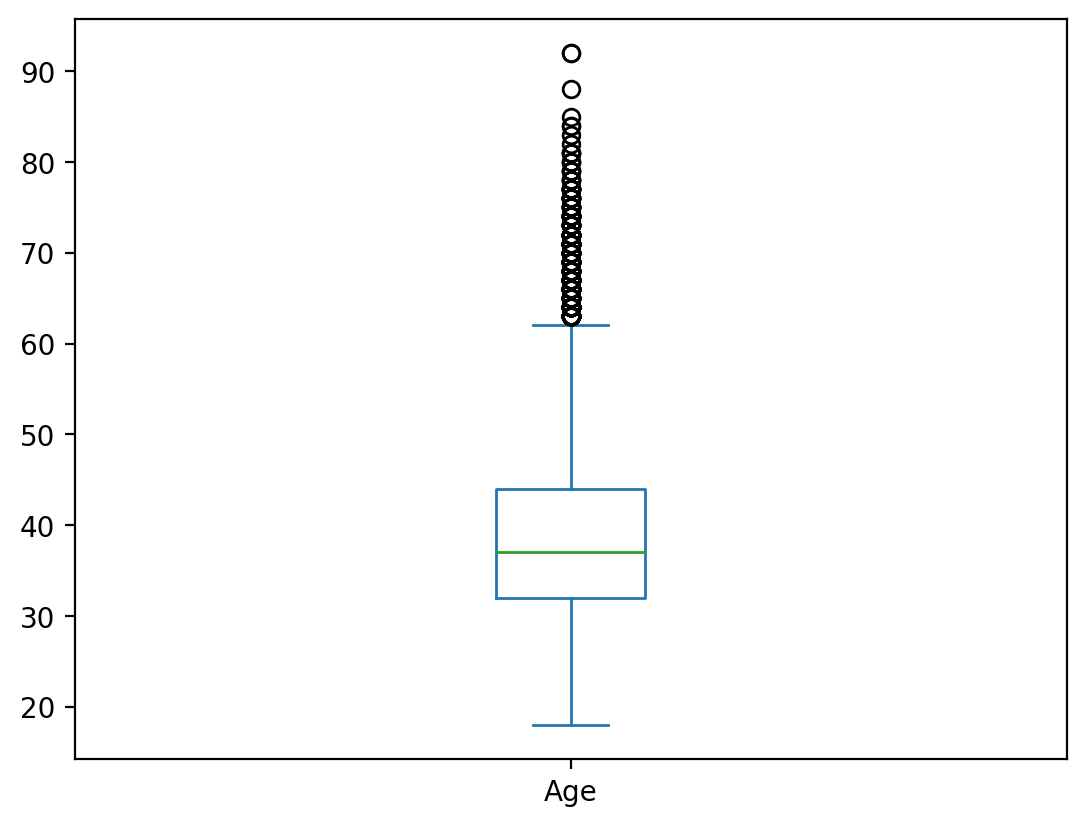

In [32]:
# Age Outliers
df[['Age']].plot.box()

<AxesSubplot:>

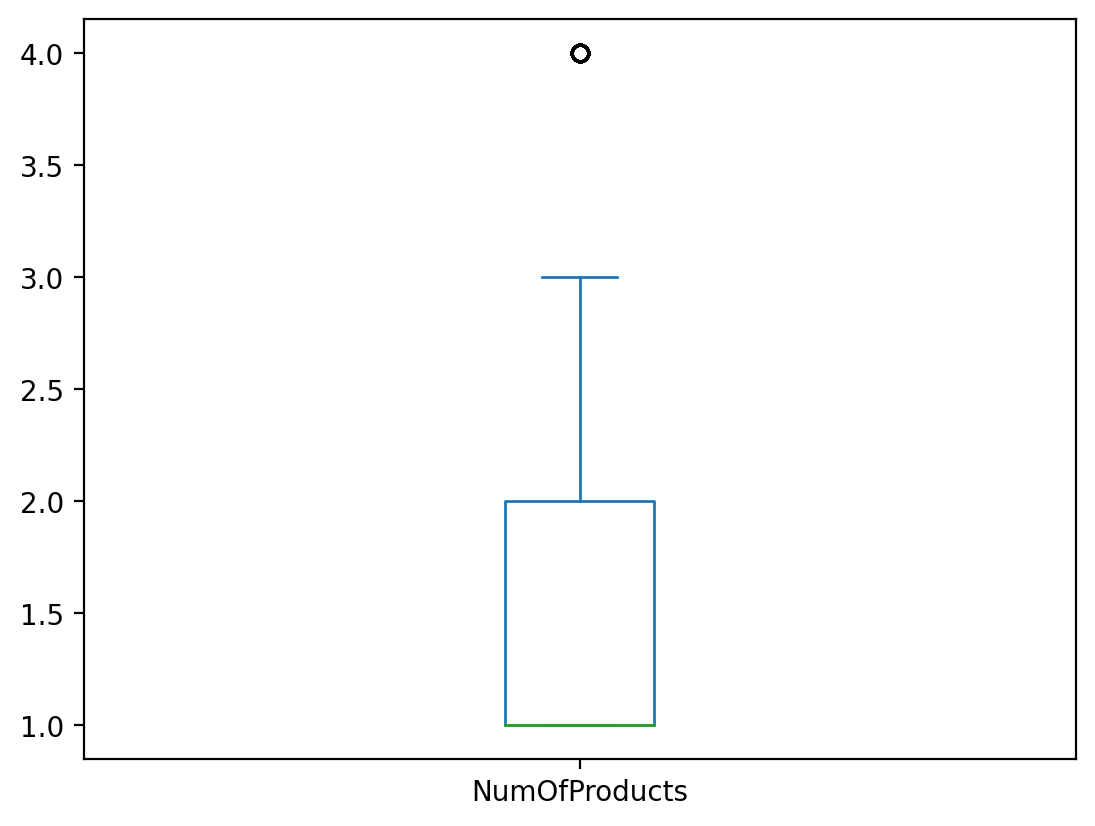

In [33]:
# Nymber of products outliers
df[['NumOfProducts']].plot.box()

<AxesSubplot:>

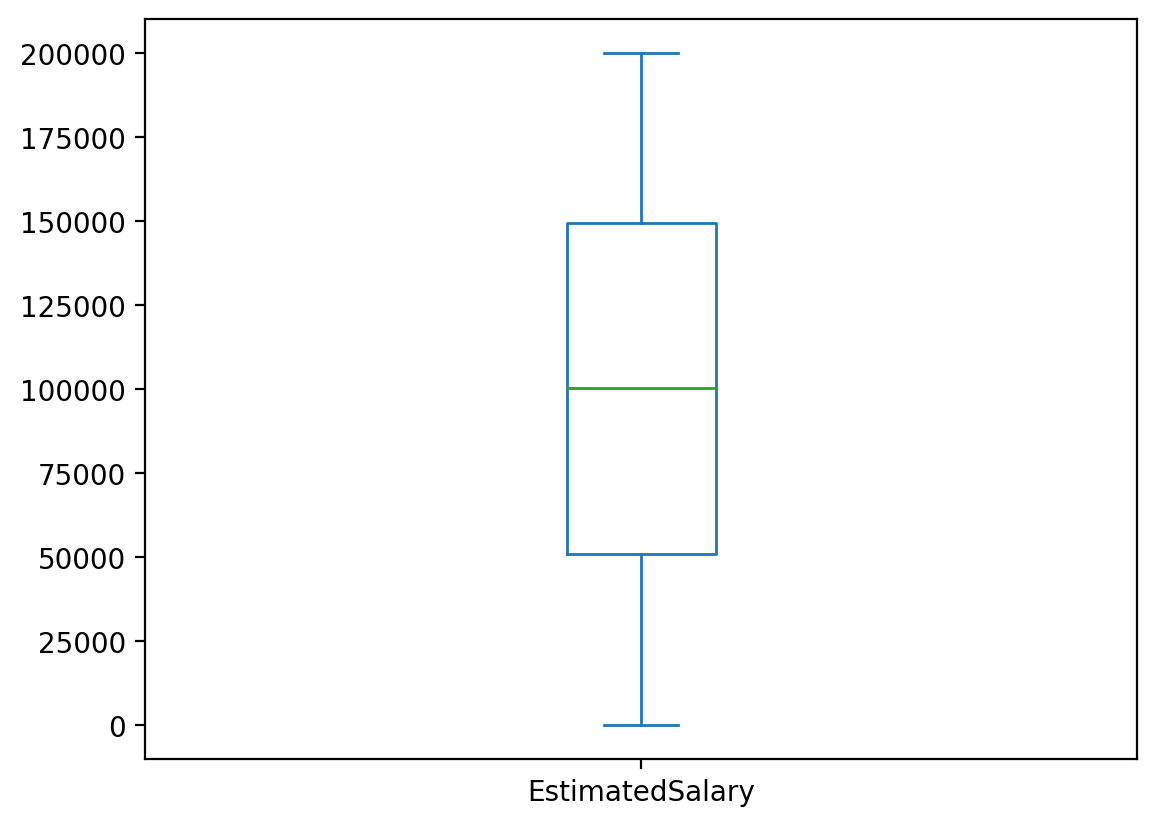

In [34]:
# Estimated Salary Outliers
df[['EstimatedSalary']].plot.box()

<AxesSubplot:>

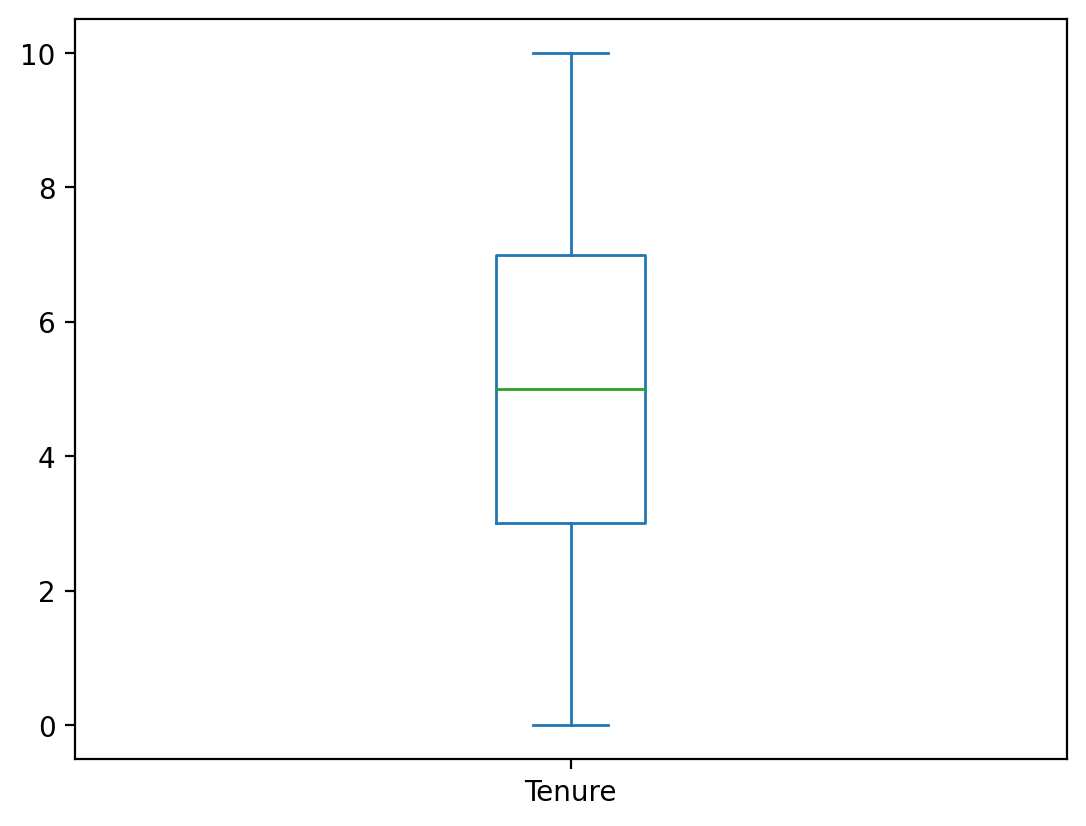

In [35]:
# Tenure Outliers
df[['Tenure']].plot.box()

<AxesSubplot:title={'center':'Customers Credit Score Distribution'}, ylabel='Frequency'>

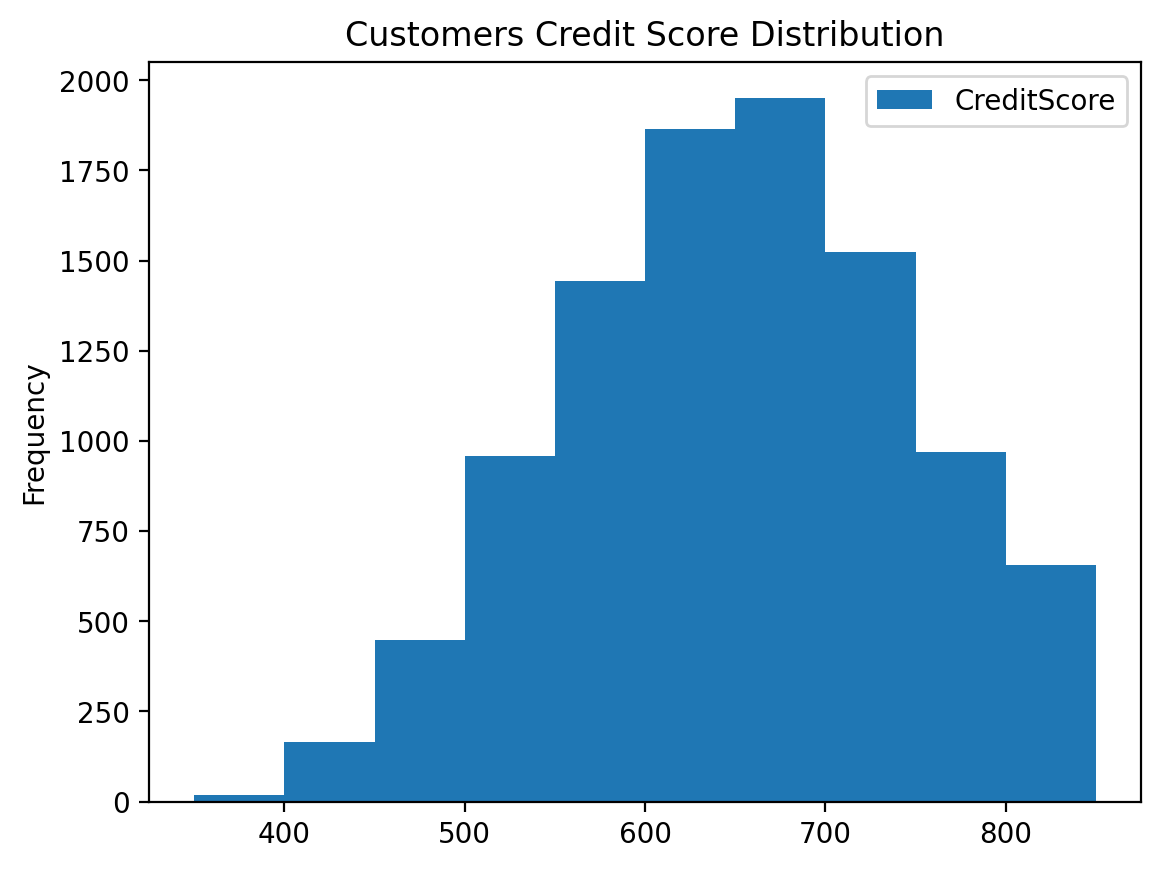

In [37]:
# Customers Credit Score Distribution
df[['CreditScore']].plot.hist(bins = 10, title = 'Customers Credit Score Distribution')

<AxesSubplot:title={'center':'Customers Age Distribution'}, ylabel='Frequency'>

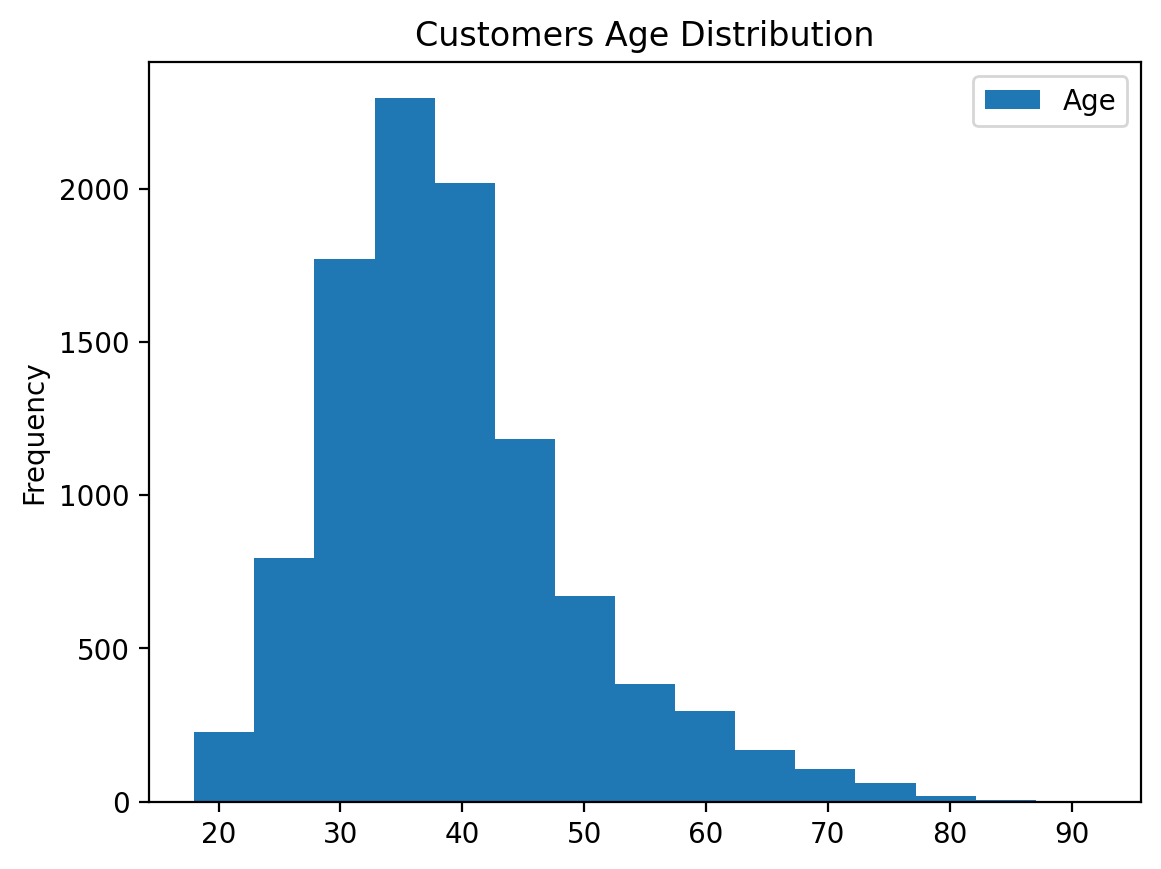

In [38]:
# Customers Age Distribution
df[['Age']].plot.hist(bins = 15, title = 'Customers Age Distribution')

In [40]:
# Features Correlations
corr = df[['CreditScore', 'Geography', 'Gender', 'Age', 'Tenure', 'Balance',
       'NumOfProducts', 'HasCrCard', 'IsActiveMember', 'EstimatedSalary',
       'Exited']].corr()
corr.style.background_gradient(cmap='RdBu_r').set_precision(2)

C:\Users\andia\anaconda3\envs\mlenv\lib\site-packages\ipykernel_launcher.py:5: FutureWarning: this method is deprecated in favour of `Styler.format(precision=..)`
  """


,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
CreditScore,1.00,-0.00,0.00,0.01,0.01,-0.01,0.03,-0.00,-0.03
Age,-0.00,1.00,-0.01,0.03,-0.03,-0.01,0.09,-0.01,0.29
Tenure,0.00,-0.01,1.00,-0.01,0.01,0.02,-0.03,0.01,-0.01
Balance,0.01,0.03,-0.01,1.00,-0.30,-0.01,-0.01,0.01,0.12
NumOfProducts,0.01,-0.03,0.01,-0.30,1.00,0.00,0.01,0.01,-0.05
HasCrCard,-0.01,-0.01,0.02,-0.01,0.00,1.00,-0.01,-0.01,-0.01
IsActiveMember,0.03,0.09,-0.03,-0.01,0.01,-0.01,1.00,-0.01,-0.16
EstimatedSalary,-0.00,-0.01,0.01,0.01,0.01,-0.01,-0.01,1.00,0.01
Exited,-0.03,0.29,-0.01,0.12,-0.05,-0.01,-0.16,0.01,1.00
